In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras import optimizers

print(tf.__version__)

2.5.0


In [ ]:
os.environ['KAGGLE_USERNAME'] = "bayuadityatriwibowo" # username from the json file
os.environ['KAGGLE_KEY'] = "2afe27d8d4c9644debf51b8e88ad9dbb" # key from the json file
!kaggle datasets download -d bayuadityatriwibowo/bangkits-peasent-dataset --path '/tmp/'

 99% 617M/621M [00:18<00:00, 25.4MB/s]
100% 621M/621M [00:18<00:00, 35.9MB/s]


In [ ]:
local_zip = '/tmp/bangkits-peasent-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
TRAINING_DIR = "/tmp/Bangkit's Peasant Dataset/train/"

Corn_healthy = os.path.join("/tmp/Bangkit's Peasant Dataset/train/Corn_(maize)___healthy")
Potato_healthy = os.path.join("/tmp/Bangkit's Peasant Dataset/train/Potato___healthy")
Tomato_healthy = os.path.join("/tmp/Bangkit's Peasant Dataset/train/Tomato___healthy")

print('total training Healthy Corn images:', len(os.listdir(Corn_healthy)))
print('total training Healthy Potato images:', len(os.listdir(Potato_healthy)))
print('total training Healthy Tomato images:', len(os.listdir(Tomato_healthy)))

Corn_files = os.listdir(Corn_healthy)
print(Corn_files[:10])
Potato_files = os.listdir(Potato_healthy)
print(Potato_files[:10])
Tomato_files = os.listdir(Tomato_healthy)
print(Tomato_files[:10])

total training Healthy Corn images: 1859
total training Healthy Potato images: 1824
total training Healthy Tomato images: 1926
['2bbd67e6-0eb0-4569-92fd-bc5fbf4c6570___R.S_HL 8344 copy 2_flipLR.jpg', 'ac10769f-266b-452e-b8ab-671bd3df69c2___R.S_HL 8344 copy.jpg', '354890d4-ba2a-43b3-a97c-f9108c480ccd___R.S_HL 8174 copy 2_flipLR.jpg', '515cfd7f-995c-4843-93f7-dc2c012db476___R.S_HL 7877 copy 2.jpg', '7784be50-f9e7-4268-aa17-80359bc7688a___R.S_HL 8231 copy.jpg', '5a1567d9-a5ee-49fe-8c0c-78a9fe25b213___R.S_HL 8164 copy 2_flipLR.jpg', 'b0222ee7-9fad-4204-8738-15eb8e879001___R.S_HL 8062 copy 2.jpg', '15297d24-b99b-4c9b-91b5-c09057867aef___R.S_HL 8028 copy.jpg', '1003bded-8167-4819-a1d8-627449fe7781___R.S_HL 7991 copy 2.jpg', '9b5d313a-6815-4b9d-ad5d-27114e767112___R.S_HL 8268 copy_flipLR.jpg']
['2dee1571-ef6b-40ef-8c46-334e89aad3f1___RS_HL 1950.JPG', '30126310-39de-4c02-b10a-23409417a4f6___RS_HL 1826_new200degFlipLR.JPG', '77c75478-e1f0-4aaa-9cbc-af1fed928a74___RS_HL 1748_new200degFlipLR.JPG'

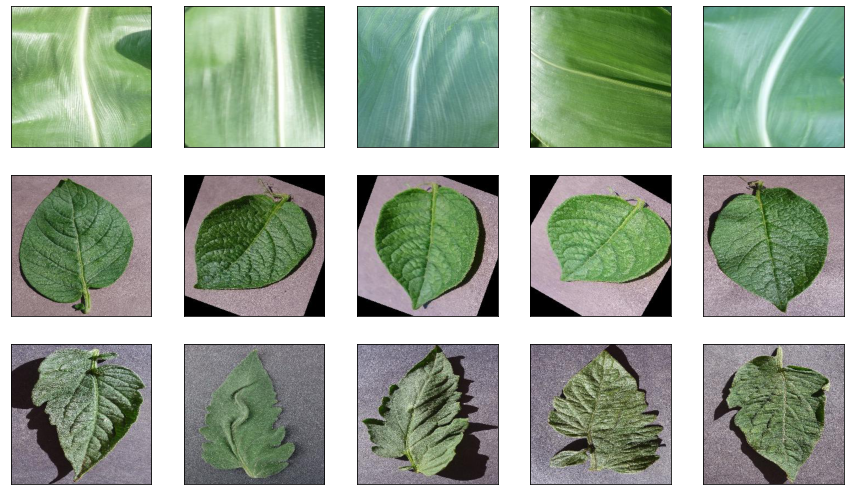

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

Corn_img = [os.path.join(Corn_healthy, fname) 
                for fname in Corn_files[pic_index-5:pic_index]]
Potato_img = [os.path.join(Potato_healthy, fname) 
                for fname in Potato_files[pic_index-5:pic_index]]
Tomato_img = [os.path.join(Tomato_healthy, fname) 
                for fname in Tomato_files[pic_index-5:pic_index]]

plt.figure(figsize=(15,15))
for i, img_path in enumerate(Corn_img+Potato_img+Tomato_img):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
plt.show()

In [ ]:
TRAINING_DIR = "/tmp/Bangkit's Peasant Dataset/train/"
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/tmp/Bangkit's Peasant Dataset/val/"
validation_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(250, 250),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(250, 250),
    class_mode='categorical',
    batch_size=32
)

model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(250, 250, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(17, activation='softmax')
])


model.summary()

Found 31363 images belonging to 17 classes.
Found 7840 images belonging to 17 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 250, 250, 3)       12        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 32)        9248      
_________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=100, steps_per_epoch=50, validation_data = validation_generator, verbose = 1)

Epoch 1/100
50/50 [==============================] - 35s 690ms/step - loss: 2.2450 - accuracy: 0.2900 - val_loss: 2.5121 - val_accuracy: 0.1710
Epoch 2/100
50/50 [==============================] - 34s 686ms/step - loss: 1.8050 - accuracy: 0.4231 - val_loss: 2.0248 - val_accuracy: 0.3895
Epoch 3/100
50/50 [==============================] - 34s 690ms/step - loss: 1.5762 - accuracy: 0.4775 - val_loss: 1.6565 - val_accuracy: 0.4733
Epoch 4/100
50/50 [==============================] - 34s 691ms/step - loss: 1.4314 - accuracy: 0.5163 - val_loss: 1.8666 - val_accuracy: 0.4250
Epoch 5/100
50/50 [==============================] - 35s 703ms/step - loss: 1.2581 - accuracy: 0.5775 - val_loss: 1.5160 - val_accuracy: 0.4953
Epoch 6/100
50/50 [==============================] - 35s 701ms/step - loss: 1.2252 - accuracy: 0.5956 - val_loss: 0.9218 - val_accuracy: 0.6802
Epoch 7/100
50/50 [==============================] - 35s 700ms/step - loss: 1.1384 - accuracy: 0.6200 - val_loss: 1.0120 - val_accuracy:

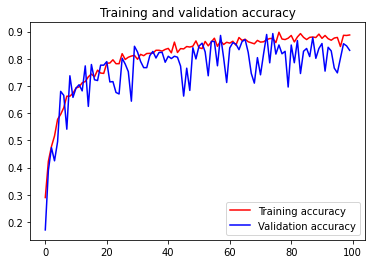

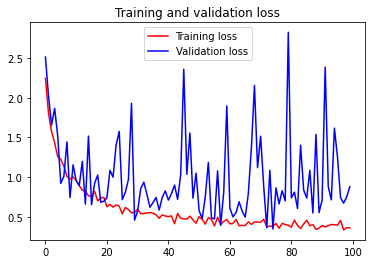

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = train_generator.class_indices.keys()

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

Saving TomatoYellowCurlVirus5.JPG to TomatoYellowCurlVirus5.JPG


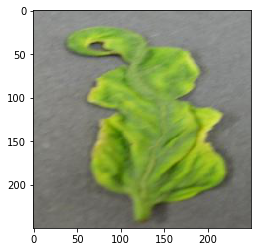

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 0.00%
Corn_(maize)___Common_rust_: 0.00%
Corn_(maize)___Northern_Leaf_Blight: 0.00%
Corn_(maize)___healthy: 0.00%
Potato___Early_blight: 0.00%
Potato___Late_blight: 0.00%
Potato___healthy: 0.00%
Tomato___Bacterial_spot: 0.00%
Tomato___Early_blight: 0.00%
Tomato___Late_blight: 0.00%
Tomato___Leaf_Mold: 0.00%
Tomato___Septoria_leaf_spot: 0.00%
Tomato___Spider_mites Two-spotted_spider_mite: 0.00%
Tomato___Target_Spot: 0.00%
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 100.00%
Tomato___Tomato_mosaic_virus: 0.00%
Tomato___healthy: 0.00%


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = train_generator.class_indices.keys()

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

In [ ]:
model.save('./baselinev3.h5')

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [ ]:
mode = " " 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
import pathlib

tflite_model_file = pathlib.Path('/content/pdv1.tflite')
tflite_model_file.write_bytes(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]